# Modelo I
Nota: Todo el procesamiento se realizo en Google Collab dado el volumen de los datos

In [18]:
!unzip "/content/drive/MyDrive/Copia de products_and_sequences.zip"

Archive:  /content/drive/MyDrive/Copia de products_and_sequences.zip
  inflating: all_products.csv        
  inflating: sequences.csv           


In [6]:
import pandas as pd
import numpy as np
import json
import sklearn

In [19]:
df = pd.read_csv('all_products.csv')
print(df.shape)
df.head()

(23838, 7)


,asin,title,description,price,images,features,rating
0,B001FB5IMI,NIVEA Soft Moisturizing Creme 6.8 Ounce (Pack ...,NaN,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,"['Light and creamy formula', 'Enriched with Vi...",4.7
1,B001EHF954,Farouk PM7426 Chi Mini Flat Iron and Mini Pro ...,NaN,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,['Chi mini flat iron features 1 1/4 inch ceram...,3.4
2,B000NWDSAE,"Neutrogena Oil-Free Acne Face Scrub, 2% Salicy...",NaN,6.78,[{'thumb': 'https://m.media-amazon.com/images/...,['4.2-fluid ounce tube of Neutrogena Oil-Free ...,4.6
3,B00BEGEQKE,Sleek Makeup - Blush By 3 Palette (367- Lace),As one of the fastest growing brands on the hi...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,['Blush by 3 is the ultimate palette offering ...,3.7
4,B008IH8SUQ,"Best Choice Products Silver 19"" Lockable Alumi...",NaN,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"['High quality aluminum frame', 'Mirror', 'Rem...",4.1


In [20]:
items = df[['asin', 'title']]
items = items.reset_index()
items = items.set_index('asin')
items.head()

,index,title
asin,,
B001FB5IMI,0,NIVEA Soft Moisturizing Creme 6.8 Ounce (Pack ...
B001EHF954,1,Farouk PM7426 Chi Mini Flat Iron and Mini Pro ...
B000NWDSAE,2,"Neutrogena Oil-Free Acne Face Scrub, 2% Salicy..."
B00BEGEQKE,3,Sleek Makeup - Blush By 3 Palette (367- Lace)
B008IH8SUQ,4,"Best Choice Products Silver 19"" Lockable Alumi..."


In [12]:

seqs =  pd.read_csv('/content/drive/MyDrive/all_sequences_3.csv')
seqs.head()

<ipython-input-12-e332ef136607>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seqs.iloc[0][0]


"['B004MKEMPI', 'B005HKST1U', 'B001KYRVSO']"

In [21]:



def padding(items: list, n: int = 3):
    padded_embeddings = np.full(n, -1)
    seq_len = min(len(items), n)
    padded_embeddings[n-seq_len:] = items[-seq_len:]
    return padded_embeddings

raw_data = seqs['Sequence']
raw_data = [eval(x) for x in raw_data]
raw_data = [[items.loc[p]['index'] for p in seq ] for seq in raw_data]
print(raw_data[0][0])
# # raw_data = tf.keras.utils.pad_sequences(raw_data, maxlen=3)
# raw_data = [padding(seq) for seq in raw_data]

from sklearn.model_selection import train_test_split

X = np.array([seq[:2] for seq in raw_data])
y = np.array([seq[2] for seq in raw_data])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1566


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parámetros del modelo
num_items = 23838  # Número total de ítems
embedding_dim = 128
hidden_dim = 256
num_layers = 2
dropout_rate = 0.3

# Construcción del modelo
model = Sequential()
model.add(Embedding(input_dim=num_items, output_dim=embedding_dim))

# Añadir múltiples capas LSTM
for _ in range(num_layers - 1):
    model.add(LSTM(hidden_dim, return_sequences=True))
    model.add(Dropout(dropout_rate))

# Última capa LSTM sin return_sequences
model.add(LSTM(hidden_dim))
model.add(Dropout(dropout_rate))

# Capa de salida
model.add(Dense(num_items, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo (suponiendo que ya tienes los datos)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predicción del siguiente ítem
# next_item = model.predict(test_sequence)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2395/2395 ━━━━━━━━━━━━━━━━━━━━ 401s 165ms/step - accuracy: 0.0022 - loss: 9.6897 - val_accuracy: 0.0045 - val_loss: 9.4303
Epoch 2/5
2395/2395 ━━━━━━━━━━━━━━━━━━━━ 443s 166ms/step - accuracy: 0.0050 - loss: 9.0378 - val_accuracy: 0.0071 - val_loss: 9.4162
Epoch 3/5
2395/2395 ━━━━━━━━━━━━━━━━━━━━ 441s 165ms/step - accuracy: 0.0093 - loss: 8.5395 - val_accuracy: 0.0098 - val_loss: 9.4848
Epoch 4/5
2395/2395 ━━━━━━━━━━━━━━━━━━━━ 451s 169ms/step - accuracy: 0.0182 - loss: 7.9495 - val_accuracy: 0.0112 - val_loss: 9.7920
Epoch 5/5
2395/2395 ━━━━━━━━━━━━━━━━━━━━ 443s 170ms/step - accuracy: 0.0407 - loss: 7.1822 - val_accuracy: 0.0138 - val_loss: 10.2339
749/749 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.0155 - loss: 10.1909
Test Loss: 10.216134071350098, Test Accuracy: 0.015700029209256172


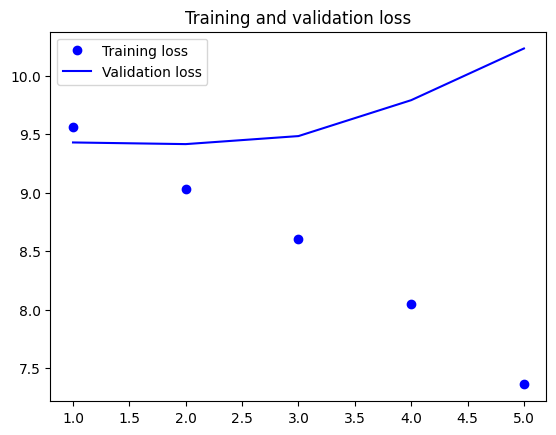

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('modelo_clasico_rnn.keras')